In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
import scipy.stats as sp
from sklearn.model_selection import GridSearchCV as GS

In [4]:
msft = pd.DataFrame.from_csv('MSFT.csv')
msft = msft.interpolate()
#changing the index to go from 1986 to 2016
msft = msft.reindex(index=msft.index[::-1])
investor = pd.DataFrame.from_csv('investor.csv')
investor = investor.fillna(investor.mean())
#changing the index to go from 1987 to 2016
investor = investor.reindex(index=investor.index[::-1])

In [5]:
def evaluateModel(prediction,actual):    
    prediction.plot(color='red', label='Prediction')
    actual.plot(color='blue', label='Actual')
    plt.legend(loc='best')
    prediction = np.array(prediction.tolist())
    actual = np.array(actual.tolist())
    print('Pearson Correlation Coeefiecient: ', sp.pearsonr(actual, prediction))
    error2 = [((x-y)/y)**2 for x, y in zip(prediction, actual)]
    print ("Normalised RMSE",np.sqrt(np.sum(error2)))

In [6]:
params =[ {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
           'epsilon':[0.001, 0.01, 0.1, 1, 5, 10, 100],
           'kernel':[ 'linear', 'rbf'],
          'gamma':[0, 0.001, 0.01, 0.1, 1]},
         {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
           'epsilon':[0.001, 0.01, 0.1, 1, 5, 10, 100],
           'kernel':['poly', 'sigmoid'],
          'degree':[1, 2, 3, 4, 5],
          'coef0':[0, 0.001, 0.01, 0.1, 1],
          'gamma':[0, 0.001, 0.01, 0.1, 1]}
         ]

In [7]:
pre2006 = investor['1987':'2005']
investorSentimentspre2006 = pre2006[['Bullish','Neutral','Bearish']]
pre2006 = msft.loc[investorSentimentspre2006.index]
pre2006 = pre2006.interpolate()
oppre2006 = pre2006.Open

First let's try this without using pearson correlation as a scoring method

In [5]:
svrModel = SVR()
gridsearch = GS(svrModel, param_grid=params)
gridsearch.fit(investorSentimentspre2006,oppre2006)
gridsearch.best_params_

{'C': 100,
 'coef0': 0.01,
 'degree': 1,
 'epsilon': 10,
 'gamma': 0,
 'kernel': 'sigmoid'}

In [8]:
svrModel = SVR(C= 100,
 coef0= 0.01,
 degree= 1,
 epsilon= 10,
 gamma= 'auto',
 kernel= 'sigmoid')

In [9]:
investor2006 = investor['2006']
investorSentiments2006 = investor2006[['Bullish','Neutral','Bearish']]
msft2006 = msft.loc[investorSentiments2006.index].interpolate()
op2006 = msft2006.Open

('Pearson Correlation Coeefiecient: ', (0.21869020128173478, 0.11933223494543195))
('Normalised RMSE', 11.02292644217764)


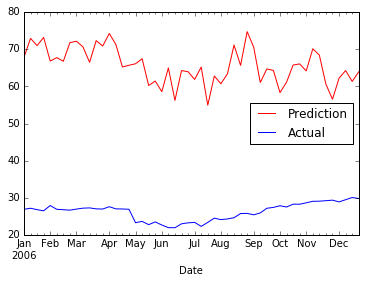

In [10]:
svrModel.fit(investorSentimentspre2006,oppre2006)
svrPred2006 = svrModel.predict(investorSentiments2006)
svrPred2006 = pd.Series(svrPred2006, investorSentiments2006.index)
evaluateModel(svrPred2006,op2006)

Now let's try this with pearson correlation  as a scoring method

In [11]:
def pearson_correlation(clf, x, y):
    xresults = clf.predict(x)
    xlist = np.array(xresults.tolist())
    ylist = np.array(y.tolist())
    num1, num2 = sp.pearsonr(ylist, xlist)
    return num1

In [12]:
svrModel2 = SVR()
gridsearch = GS(svrModel2, param_grid=params, scoring=pearson_correlation)
gridsearch.fit(investorSentimentspre2006,oppre2006)
gridsearch.best_params_

{'C': 100,
 'coef0': 1,
 'degree': 5,
 'epsilon': 0.001,
 'gamma': 1,
 'kernel': 'poly'}

In [13]:
svrModel = SVR(C= 100,
 coef0= 1,
 degree= 5,
 epsilon= 0.001,
 gamma= 1,
 kernel= 'poly')

('Pearson Correlation Coeefiecient: ', (0.00035377690608696792, 0.99801398382833706))
('Normalised RMSE', 10.227004231556094)


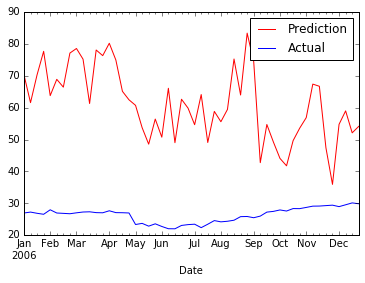

In [14]:
svrModel.fit(investorSentimentspre2006,oppre2006)
svrPred2006 = svrModel.predict(investorSentiments2006)
svrPred2006 = pd.Series(svrPred2006, investorSentiments2006.index)
evaluateModel(svrPred2006,op2006)

For both the models constructed, they seem overly optimistic in their prediction. 

However, the second model while having large fluctuations, it seems score better in terms of nRMSE values.